<a href="https://colab.research.google.com/github/rufego/fencing_lunge/blob/main/fencing_launch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rufego/fencing_lunge.git

Cloning into 'fencing_lunge'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 370.29 KiB | 9.74 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
pip install mediapipe==0.10.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled pr

/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


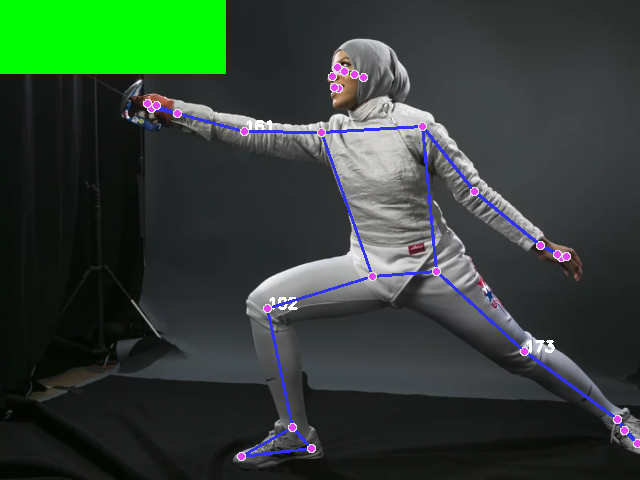

In [2]:
import cv2
import math
import numpy as np
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Initialize MediaPipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Function to calculate angles
def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - \
              np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle
    return angle

# Settings
IMAGE_FILES = ["/content/fencing_lunge/lunge1.jpg"]
BG_COLOR = (192, 192, 192)
width, height = 640, 480

# Start Pose detection
with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False,
                  min_detection_confidence=0.5) as pose:

    for idx, file in enumerate(IMAGE_FILES):
        img = cv2.imread(file)
        if img is None:
            print(f"Image {file} not found")
            continue

        # Resize image
        image = cv2.resize(img, (width, height))
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        if not results.pose_landmarks:
            print(f"No pose detected in {file}")
            continue

        annotated_image = image.copy()
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR

        try:
            landmarks = results.pose_landmarks.landmark

            # Right arm
            r_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            r_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,
                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            r_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            # Right leg
            r_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                     landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            r_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            r_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,
                       landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            # Left leg
            l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                       landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            # Calculate angles
            angle_right_arm = calculate_angle(r_shoulder, r_elbow, r_wrist)
            angle_right_leg = calculate_angle(r_hip, r_knee, r_ankle)
            angle_left_leg = calculate_angle(l_hip, l_knee, l_ankle)

            # Draw angles
            cv2.putText(annotated_image, str(int(angle_right_arm)),
                        tuple(np.multiply(r_elbow, [width, height]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            cv2.putText(annotated_image, str(int(angle_right_leg)),
                        tuple(np.multiply(r_knee, [width, height]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            cv2.putText(annotated_image, str(int(angle_left_leg)),
                        tuple(np.multiply(l_knee, [width, height]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

            # Color rectangle based on angles
            if (angle_right_arm > 120) and (90 < angle_right_leg < 130) and (angle_left_leg > 160):
                color = (0, 255, 0)
            else:
                color = (0, 0, 255)

            cv2.rectangle(annotated_image, (0, 0), (225, 73), color, -1)

        except Exception as e:
            print("Landmark error:", e)
            continue

        # Draw skeleton
        mp_drawing.draw_landmarks(
            annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2),
            mp_drawing.DrawingSpec(color=(235, 52, 47), thickness=2, circle_radius=2),
        )

        # Save and display
        cv2.imwrite(f'annotated_image{idx}.png', annotated_image)
        cv2_imshow(annotated_image)

An example with negative result would be:

 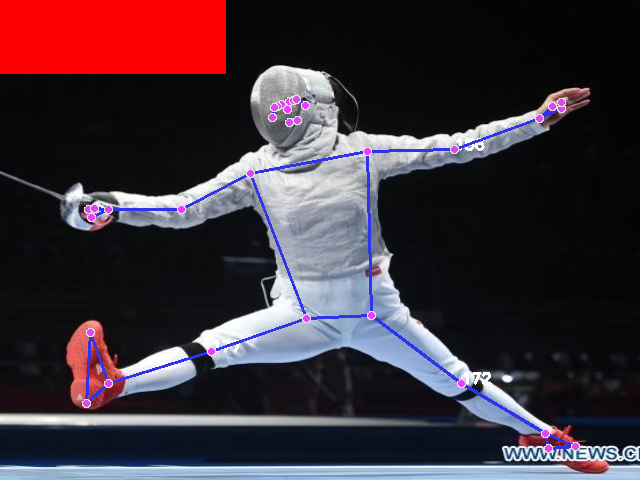

Some particularly useful commands are:

In [3]:
results.pose_landmarks

landmark {
  x: 0.518950939
  y: 0.160384804
  z: -0.303828567
  visibility: 0.999961734
}
landmark {
  x: 0.529123187
  y: 0.14537555
  z: -0.308617085
  visibility: 0.999867439
}
landmark {
  x: 0.533927917
  y: 0.146786422
  z: -0.309096485
  visibility: 0.999867201
}
landmark {
  x: 0.538846791
  y: 0.14823328
  z: -0.3089284
  visibility: 0.999888897
}
landmark {
  x: 0.525772452
  y: 0.142073482
  z: -0.284154952
  visibility: 0.999847889
}
landmark {
  x: 0.52657342
  y: 0.141554087
  z: -0.284703642
  visibility: 0.999874592
}
landmark {
  x: 0.527320623
  y: 0.140899688
  z: -0.284993142
  visibility: 0.999882
}
landmark {
  x: 0.567985177
  y: 0.161894053
  z: -0.280501664
  visibility: 0.99991262
}
landmark {
  x: 0.55354023
  y: 0.155860245
  z: -0.169485271
  visibility: 0.999820173
}
landmark {
  x: 0.528196
  y: 0.184797376
  z: -0.288786322
  visibility: 0.999896884
}
landmark {
  x: 0.523248136
  y: 0.183004081
  z: -0.259586275
  visibility: 0.999813259
}
landmark {
 

In [5]:
from mediapipe.python.solutions import pose as mp_pose

# List all landmarks names
for landmark in mp_pose.PoseLandmark:
    print(landmark.name, landmark.value)

NOSE 0
LEFT_EYE_INNER 1
LEFT_EYE 2
LEFT_EYE_OUTER 3
RIGHT_EYE_INNER 4
RIGHT_EYE 5
RIGHT_EYE_OUTER 6
LEFT_EAR 7
RIGHT_EAR 8
MOUTH_LEFT 9
MOUTH_RIGHT 10
LEFT_SHOULDER 11
RIGHT_SHOULDER 12
LEFT_ELBOW 13
RIGHT_ELBOW 14
LEFT_WRIST 15
RIGHT_WRIST 16
LEFT_PINKY 17
RIGHT_PINKY 18
LEFT_INDEX 19
RIGHT_INDEX 20
LEFT_THUMB 21
RIGHT_THUMB 22
LEFT_HIP 23
RIGHT_HIP 24
LEFT_KNEE 25
RIGHT_KNEE 26
LEFT_ANKLE 27
RIGHT_ANKLE 28
LEFT_HEEL 29
RIGHT_HEEL 30
LEFT_FOOT_INDEX 31
RIGHT_FOOT_INDEX 32


In [6]:
landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value]

x: 0.964898944
y: 0.873652101
z: -0.0102679608
visibility: 0.959172904

In [7]:
#matching landmark with name, image above
mp_pose.PoseLandmark.LEFT_ANKLE.value

27

The code below execute the same action but with the video capture from your camera.

In [ ]:
cap = cv2.VideoCapture(0)

#To know webcam resolution
#width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#print(width, height)



with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while True:
        ret, frame = cap.read()

        image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # make detection
        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # extract lamdmarks
        # we need the "try" to work when we dont have any landmark on screen
        try:
            landmarks = results.pose_landmarks.landmark

            r_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            r_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            r_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            r_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            r_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            r_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            l_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            l_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            l_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            angle_right_arm = calculate_angle(r_shoulder, r_elbow, r_wrist)
            angle_right_leg = calculate_angle(r_hip, r_knee, r_ankle)
            angle_left_leg = calculate_angle(l_hip,l_knee,l_ankle)

                #print("angulo:",angle_right_arm)
            cv2.putText(image, str(math.trunc(angle_right_arm)),
                  tuple(np.multiply(r_elbow, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                            )
            cv2.putText(image, str(math.trunc(angle_right_leg)),
                            tuple(np.multiply(r_knee, [640,480]).astype(int)),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                            )
            cv2.putText(image, str(math.trunc(angle_left_leg)),
                            tuple(np.multiply(l_knee, [640,480]).astype(int)),
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                            )
            #print(landmarks)
            if (angle_right_arm > 120) and (angle_right_leg > 90 and angle_right_leg < 130) and (angle_left_leg > 160):
                    color = (0,255, 0)
            else:
                    color = (0,0,255)


            cv2.rectangle(image,(0,0), (225,73),color,-1)

        except:
            pass

        # render detection
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(235,52,47), thickness=2, circle_radius=2),
                                 )


        cv2.imshow('fencing',image)

        if cv2.waitKey(1) == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()